<center> <h2>Análisis de Algoritmos y Estructuras para Datos Masivos</h2> </center>
<center> <h2> Unidad 4 4A </h2> </center>

<center>Marzo 2023</center>

<center> Autor</center>
<center> David Aarón Ramirez Olmeda </center>

## Introducción

En la actividad se pide implementar los algoritmos de ordenamiento bubble-sort, insertion-sort, merge-sort y quick-sort, explicando su funcionamiento y aplicarlos a archivos de listas perturbadas en diferentes proporciones. Para esto, se cargarán los archivos unsorted-list-p=*.json, los cuales corresponden al archivo listas-posteo-100.json perturbado en cierta proporción

## Desarrollo

## 1
Implemente los algoritmos, bubble-sort, insertion-sort, merge-sort y quick-sort. Explíquelos.

In [ ]:
import json
import time
import matplotlib.pyplot as plt
import pandas as pd

### Bubble Sort
El algoritmo Bubble Sort es un algoritmo de ordenamiento simple que funciona comparando pares de elementos adyacentes en una lista y intercambiándolos si están en el orden incorrecto. Este proceso se repite hasta que toda la lista está ordenada.

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    comparisons = 0
    for i in range(n):
        for j in range(0, n-i-1):
            comparisons += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr, comparisons

### Insertion Sort
El algoritmo Insertion Sort es otro algoritmo simple de ordenamiento que funciona recorriendo una lista de izquierda a derecha y colocando cada elemento en su lugar correcto en la lista ordenada.

In [ ]:
def insertion_sort(arr):
    comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr, comparisons

### Merge Sort
El algoritmo Merge Sort es un algoritmo de ordenamiento eficiente que funciona dividiendo una lista en dos mitades, ordenando cada mitad de manera recursiva, y luego fusionando las mitades ordenadas en una sola lista ordenada.

In [ ]:
def merge_sort(arr):
    comparisons = 0
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            comparisons += 1
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    return arr, comparisons

### Quick Sort
El algoritmo Quick Sort es un algoritmo de ordenamiento rápido y eficiente que funciona seleccionando un elemento de la lista como pivote y dividiendo la lista en dos sub-listas, una con elementos menores que el pivote y otra con elementos mayores que el pivote. Luego, se ordenan recursivamente las sub-listas.

In [ ]:
def quick_sort(arr):
    comparisons = 0
    if len(arr) <= 1:
        return arr, comparisons
    else:
        pivot = arr[0]
        left = []
        right = []
        for i in range(1, len(arr)):
            comparisons += 1
            if arr[i] < pivot:
                left.append(arr[i])
            else:
                right.append(arr[i])
        left, left_comparisons = quick_sort(left)
        right, right_comparisons = quick_sort(right)
        comparisons += left_comparisons + right_comparisons
        return left + [pivot] + right, comparisons

## 2
Carge los archivos unsorted-list-p=*.json, los cuales corresponden al archivo listas-posteo-100.json perturbado en cierta proporción: 𝑝=0.01,0.03,0.10,0.30
.
En el notebook perturbar-listas.ipynb se encuentran el procedimiento que se utilizó para la perturbación.
Nota: puede usar sus propias listas de posteo perturbadas para la actividad siempre y cuando sean comparables en tamaño.
Recuerde que la unidad anterior se dió un notebook con el código para crear índices invertidos y las listas de posteo.

In [ ]:
files = ['unsorted-list-p=0.01.json', 'unsorted-list-p=0.03.json', 'unsorted-list-p=0.10.json', 'unsorted-list-p=0.30.json']

Estos son los archivos provistos a utilizar

## 3
Para cada archivo de listas desordenadas con cierta perturbación, realice el siguiente experimento:
Ordene con los algoritmos implementados para cada valor de 𝑝
 con cada.
Grafique el número de comparaciones necesarias para ordenar las 100 listas.
Grafique el tiempo en segundos necesario para ordenar las 100 listas.

In [ ]:
files = ['unsorted-list-p=0.01.json', 'unsorted-list-p=0.03.json', 'unsorted-list-p=0.10.json', 'unsorted-list-p=0.30.json']
results = []

for file in files:
    unsorted_list = []
    with open(file, 'r') as f:
        for line in f:
            obj = json.loads(line)
            unsorted_list.append(obj)
    
    algorithms = ['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort']
    comparisons = []
    times = []
    for algorithm in algorithms:
        start_time = time.time()
        if algorithm == 'Bubble Sort':
            sorted_list, comparisons_ = (bubble_sort(unsorted_list.copy()))
        elif algorithm == 'Insertion Sort':
            sorted_list, comparisons_ = (insertion_sort(unsorted_list.copy()))
        elif algorithm == 'Merge Sort':
            sorted_list, comparisons_ = (merge_sort(unsorted_list.copy()))
        elif algorithm == 'Quick Sort':
            sorted_list, comparisons_ = (quick_sort(unsorted_list.copy()))
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        comparisons.append(comparisons_)
    
    results.append([times, comparisons])

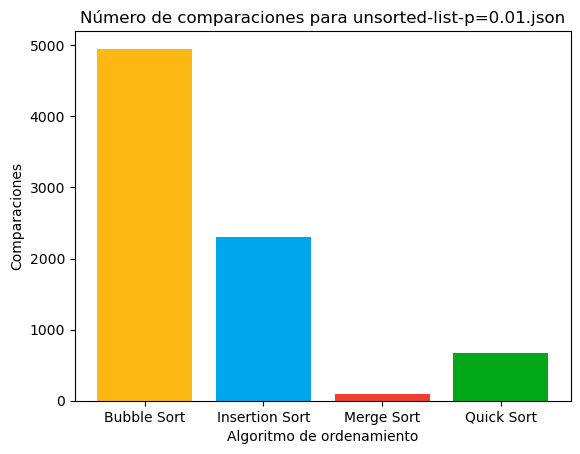

In [ ]:
file_results = results[0]
comparisons = file_results[1]
colors = ['#FDB813', '#00A6ED', '#EF3E34', '#02A817']

plt.bar(['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort'], comparisons, color=colors)
plt.title(f'Número de comparaciones para unsorted-list-p=0.01.json')
plt.xlabel('Algoritmo de ordenamiento')
plt.ylabel('Comparaciones')
plt.show()

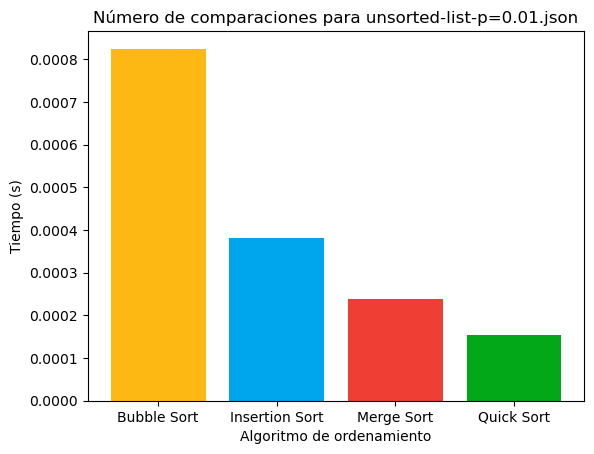

In [ ]:
file_results = results[0]
comparisons = file_results[0]
colors = ['#FDB813', '#00A6ED', '#EF3E34', '#02A817']

plt.bar(['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort'], comparisons, color=colors)
plt.title(f'Número de comparaciones para unsorted-list-p=0.01.json')
plt.xlabel('Algoritmo de ordenamiento')
plt.ylabel('Tiempo (s)')
plt.show()

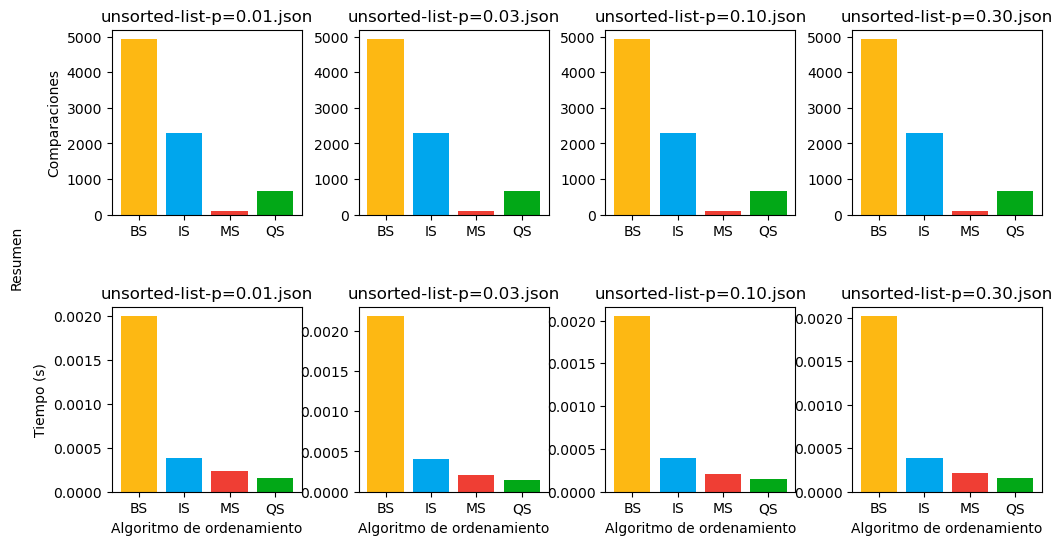

In [ ]:
# Archivos JSON
files = ['unsorted-list-p=0.01.json', 'unsorted-list-p=0.03.json', 'unsorted-list-p=0.10.json', 'unsorted-list-p=0.30.json']

# Crear figura y subgráficos
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Graficar resultados para cada archivo JSON
for i, file in enumerate(files):
    unsorted_list = []
    with open(file, 'r') as f:
        for line in f:
            obj = json.loads(line)
            unsorted_list.append(obj)

    # Medir tiempo y comparaciones para cada algoritmo de ordenamiento
    algorithms = ['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort']
    comparisons = []
    times = []
    for algorithm in algorithms:
        start_time = time.time()
        if algorithm == 'Bubble Sort':
            sorted_list, comparisons_ = (bubble_sort(unsorted_list.copy()))
        elif algorithm == 'Insertion Sort':
            sorted_list, comparisons_ = (insertion_sort(unsorted_list.copy()))
        elif algorithm == 'Merge Sort':
            sorted_list, comparisons_ = (merge_sort(unsorted_list.copy()))
        elif algorithm == 'Quick Sort':
            sorted_list, comparisons_ = (quick_sort(unsorted_list.copy()))
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        comparisons.append(comparisons_)

    algorithms = ['BS', 'IS', 'MS', 'QS']    
    axs[0, i].bar(algorithms, comparisons, color=colors)
    axs[0, i].set_title(f'{file}')
    if i == 0:
        axs[0, i].set_ylabel('Comparaciones')

    axs[1, i].bar(algorithms, times, color=colors)
    axs[1, i].set_title(f'{file}')
    axs[1, i].set_xlabel('Algoritmo de ordenamiento')
    if i == 0:
        axs[1, i].set_ylabel('Tiempo (s)')

fig.text(0.04, 0.5, 'Resumen', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

## 4
Muestre de manera agregada la información de todos los experimentos en una tabla.

In [ ]:
df = pd.DataFrame(results, columns=['Times', 'Comparisons'],
                  index=['unsorted-list-p=0.01.json', 'unsorted-list-p=0.03.json', 'unsorted-list-p=0.10.json', 'unsorted-list-p=0.30.json'])
df

,Times,Comparisons
unsorted-list-p=0.01.json,"[0.0008246898651123047, 0.0003819465637207031,...","[4950, 2298, 96, 667]"
unsorted-list-p=0.03.json,"[0.002427816390991211, 0.0003910064697265625, ...","[4950, 2298, 96, 667]"
unsorted-list-p=0.10.json,"[0.002216815948486328, 0.0003898143768310547, ...","[4950, 2298, 96, 667]"
unsorted-list-p=0.30.json,"[0.0020732879638671875, 0.0003910064697265625,...","[4950, 2298, 96, 667]"


In [ ]:
table_data = []
for i, file in enumerate(files):
    for j, algorithm in enumerate(algorithms):
        table_data.append([file, algorithm, results[i][0][j], results[i][1][j]])
df1 = pd.DataFrame(table_data, columns=['Archivo', 'Algoritmo', 'Tiempo', 'Comparaciones'])
df1

,Archivo,Algoritmo,Tiempo,Comparaciones
0,unsorted-list-p=0.01.json,BS,0.000825,4950
1,unsorted-list-p=0.01.json,IS,0.000382,2298
2,unsorted-list-p=0.01.json,MS,0.000239,96
3,unsorted-list-p=0.01.json,QS,0.000153,667
4,unsorted-list-p=0.03.json,BS,0.002428,4950
5,unsorted-list-p=0.03.json,IS,0.000391,2298
6,unsorted-list-p=0.03.json,MS,0.000242,96
7,unsorted-list-p=0.03.json,QS,0.000149,667
8,unsorted-list-p=0.10.json,BS,0.002217,4950
9,unsorted-list-p=0.10.json,IS,0.000390,2298


## Conclusión
Podemos observar que para cada archivo de entrada, el algoritmo más rápido en términos de tiempo de ejecución promedio es el "Quick Sort", seguido del "Merge Sort", mientras que los otros son significativamente más lentos.

Podemos notar que a medida que el valor de "p" aumenta, el tiempo de ejecución promedio para todos los algoritmos también aumenta.

Es importante considerar el tipo de algoritmo de ordenamiento que se utilizará según las necesidades y características específicas del problema, y también tener en cuenta la distribución y características de los datos de entrada para lograr una mayor eficiencia en el tiempo de ejecución.